In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Understanding the Dataset

In [17]:

heart = pd.read_csv('heart.csv')
heart.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [3]:
import pandas as pd
heart = pd.read_csv('heart.csv')
pd.set_option('display.max_columns', None)
print("First few rows:")
print(heart.head())

# Display the last few rows
print("\nLast few rows:")
print(heart.tail())


First few rows:
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  

Last few rows:
      age  sex  chest pai

In [4]:
print(heart.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None


In [6]:
print(heart.describe())

               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359       25.517636     

In [7]:
print(heart.sample(5))

     age  sex  chest pain type  resting bp s  cholesterol  \
1     49    0                3           160          180   
687   61    1                4           120          260   
485   65    1                4           134            0   
265   47    1                3           140          193   
662   58    1                3           140          211   

     fasting blood sugar  resting ecg  max heart rate  exercise angina  \
1                      0            0             156                0   
687                    0            0             140                1   
485                    0            0             112                1   
265                    0            0             145                1   
662                    1            2             165                0   

     oldpeak  ST slope  target  
1        1.0         2       1  
687      3.6         2       1  
485      1.1         2       1  
265      1.0         2       1  
662      0.0         1 

In [8]:
print(heart.isnull().sum())

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [6]:
# Counting individuals with heart disease based on gender
male_with_disease = heart[(heart['sex'] == 1) & (heart['target'] == 1)].shape[0]
female_with_disease = heart[(heart['sex'] == 0) & (heart['target'] == 1)].shape[0]

print(f"Number of males with heart disease: {male_with_disease}")
print(f"Number of females with heart disease: {female_with_disease}")


Number of males with heart disease: 559
Number of females with heart disease: 70


In [7]:
# Count of males and females with heart disease
male_heart_disease = len(heart[(heart['sex'] == 1) & (heart['target'] == 1)])
female_heart_disease = len(heart[(heart['sex'] == 0) & (heart['target'] == 1)])

# Count of males and females without heart disease
male_no_heart_disease = len(heart[(heart['sex'] == 1) & (heart['target'] == 0)])
female_no_heart_disease = len(heart[(heart['sex'] == 0) & (heart['target'] == 0)])

print("Male with Heart Disease:", male_heart_disease)
print("Female with Heart Disease:", female_heart_disease)
print("Male without Heart Disease:", male_no_heart_disease)
print("Female without Heart Disease:", female_no_heart_disease)


Male with Heart Disease: 559
Female with Heart Disease: 70
Male without Heart Disease: 350
Female without Heart Disease: 211


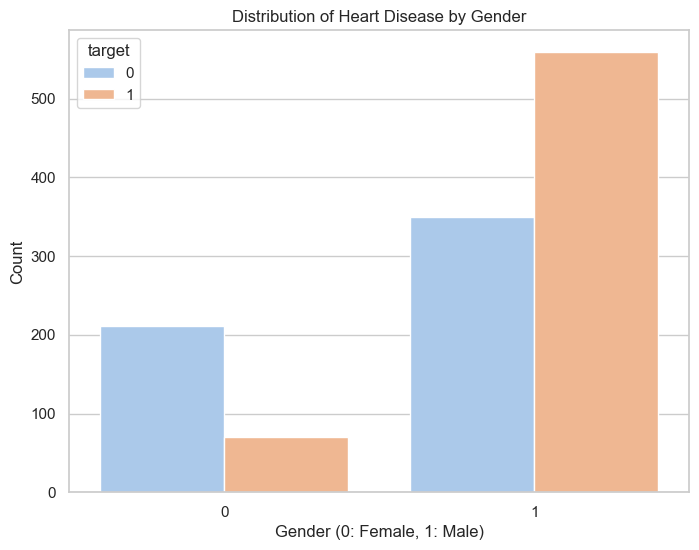

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=heart, palette="pastel")

# Add labels and title
plt.title('Distribution of Heart Disease by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')

# Show the plot
plt.show()



Sex Analysis:
sex
1    909
0    281
Name: count, dtype: int64
sex
1    76.386555
0    23.613445
Name: count, dtype: float64


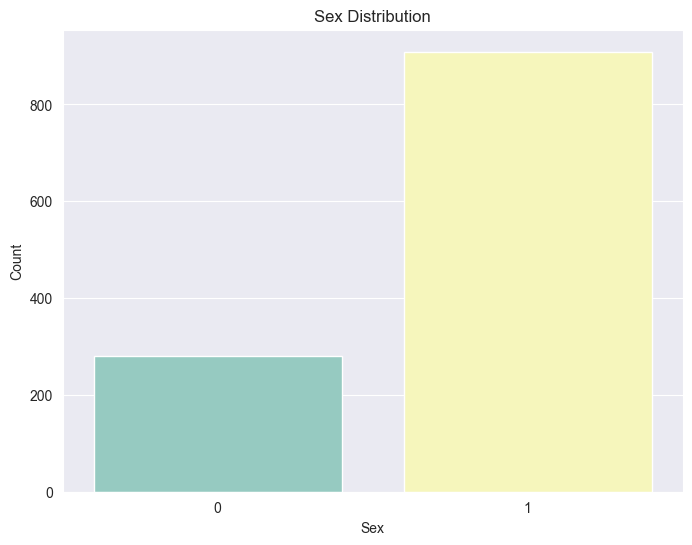


Chest pain type Analysis:
chest pain type
4    625
3    283
2    216
1     66
Name: count, dtype: int64
chest pain type
4    52.521008
3    23.781513
2    18.151261
1     5.546218
Name: count, dtype: float64


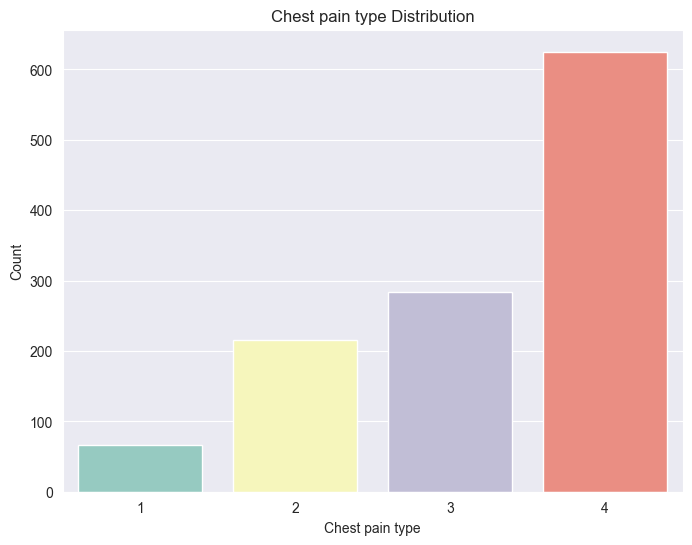


Fasting blood sugar Analysis:
fasting blood sugar
0    936
1    254
Name: count, dtype: int64
fasting blood sugar
0    78.655462
1    21.344538
Name: count, dtype: float64


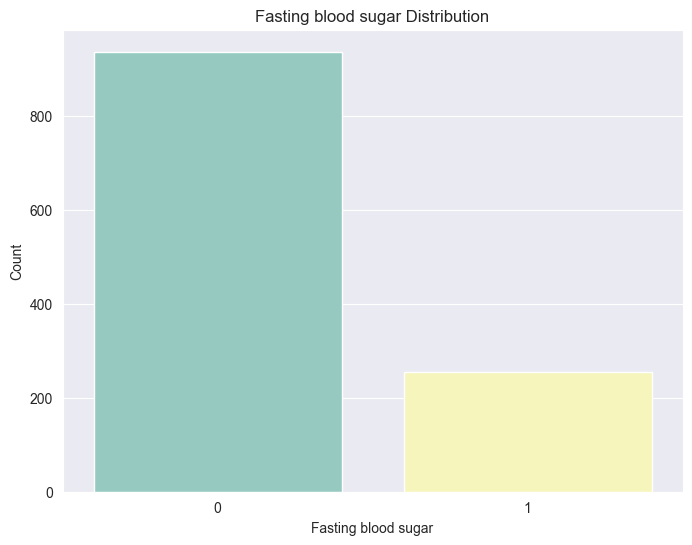


Resting ecg Analysis:
resting ecg
0    684
2    325
1    181
Name: count, dtype: int64
resting ecg
0    57.478992
2    27.310924
1    15.210084
Name: count, dtype: float64


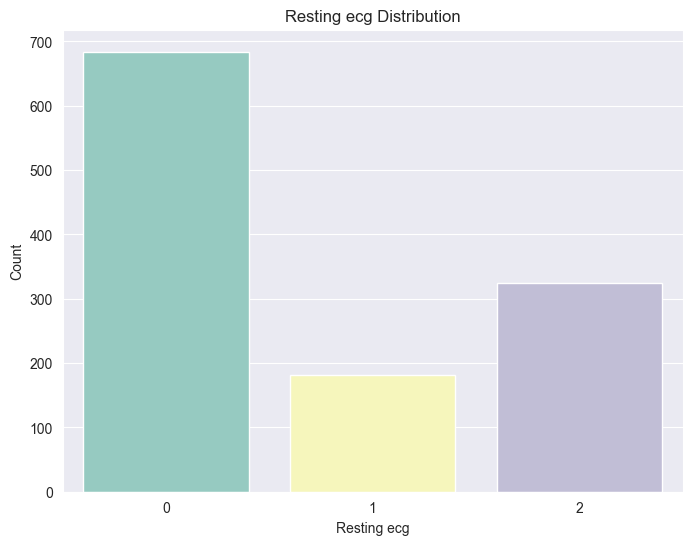


Exercise angina Analysis:
exercise angina
0    729
1    461
Name: count, dtype: int64
exercise angina
0    61.260504
1    38.739496
Name: count, dtype: float64


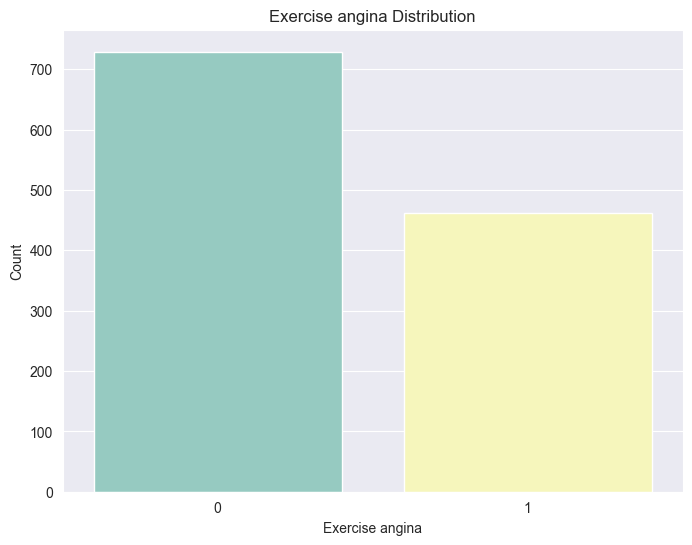


St slope Analysis:
ST slope
2    582
1    526
3     81
0      1
Name: count, dtype: int64
ST slope
2    48.907563
1    44.201681
3     6.806723
0     0.084034
Name: count, dtype: float64


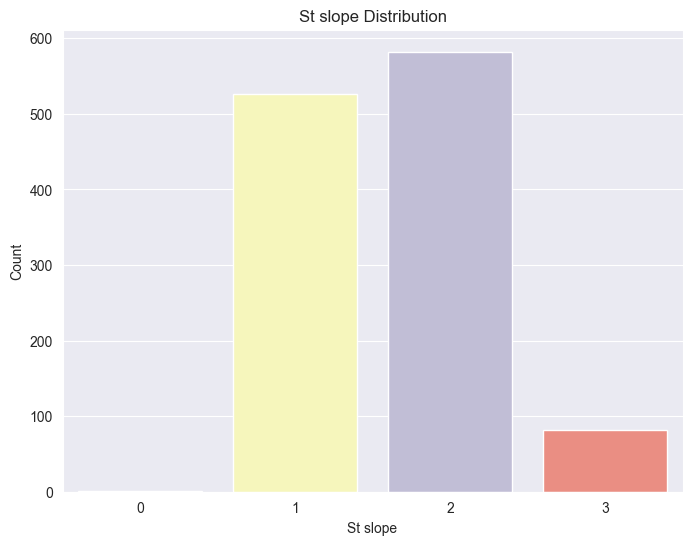


Target Analysis:
target
1    629
0    561
Name: count, dtype: int64
target
1    52.857143
0    47.142857
Name: count, dtype: float64


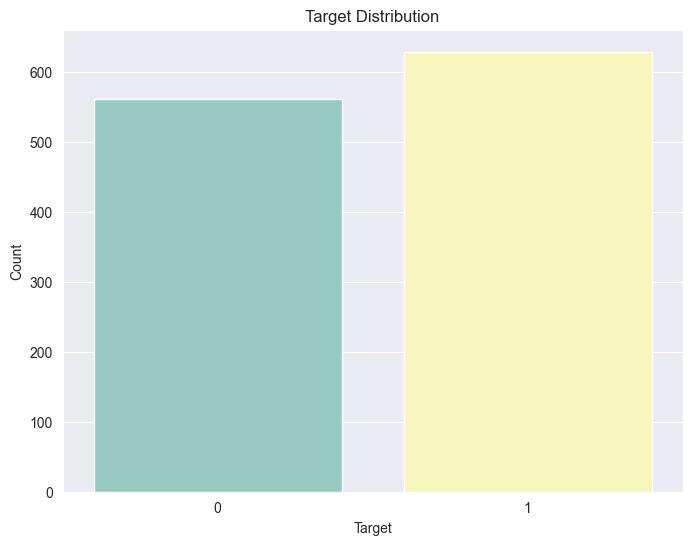

In [9]:
# List of categorical variables
categorical_vars = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 
                    'exercise angina', 'ST slope', 'target']


# Calculate frequency and proportions for each category
for var in categorical_vars:
    category_counts = heart[var].value_counts()
    category_proportions = category_counts / len(heart) * 100
    

    print(f"\n{var.capitalize()} Analysis:")
    print(category_counts)
    print(category_proportions)

    # Create a bar plot
    plt.figure(figsize=(8, 6))
    sns.countplot(data=heart, x=var, palette="Set3")
    plt.title(f"{var.capitalize()} Distribution")
    plt.xlabel(var.capitalize())
    plt.ylabel("Count")
    plt.show()

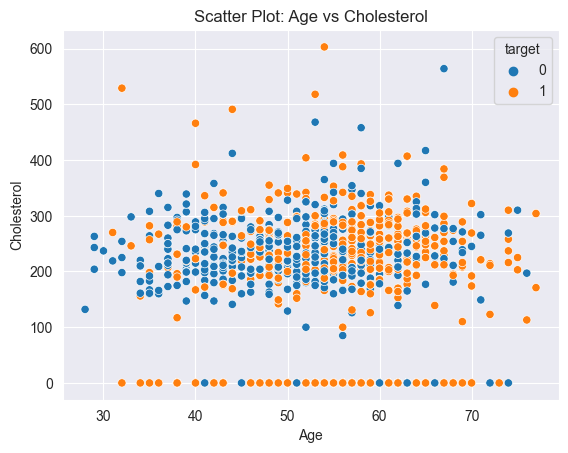

In [77]:
sns.scatterplot(x='age', y='cholesterol', hue='target', data=heart)
plt.title('Scatter Plot: Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()


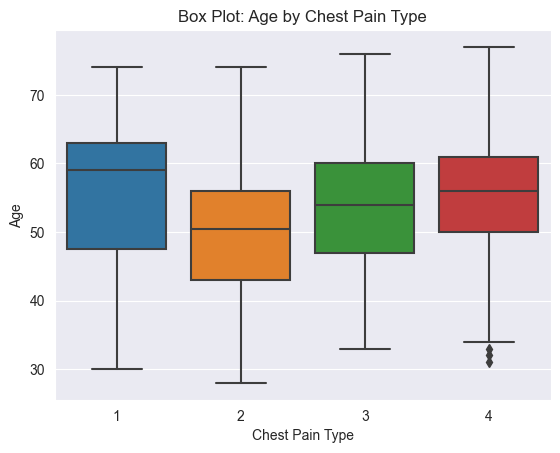

In [78]:
sns.boxplot(x='chest pain type', y='age', data=heart)
plt.title('Box Plot: Age by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.show()


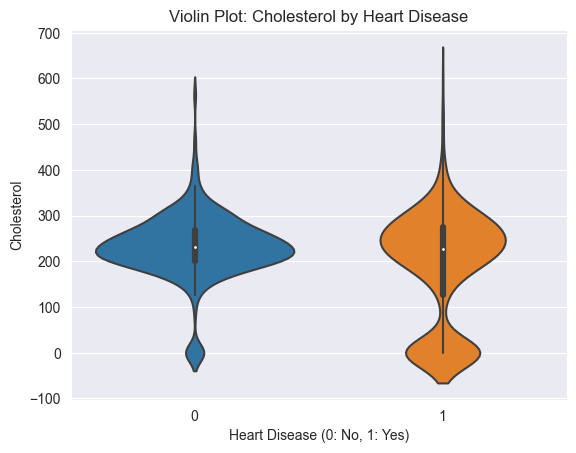

In [79]:
sns.violinplot(x='target', y='cholesterol', data=heart)
plt.title('Violin Plot: Cholesterol by Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Cholesterol')
plt.show()


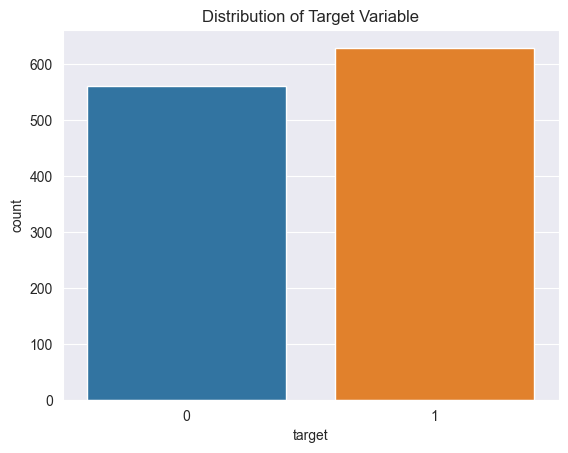

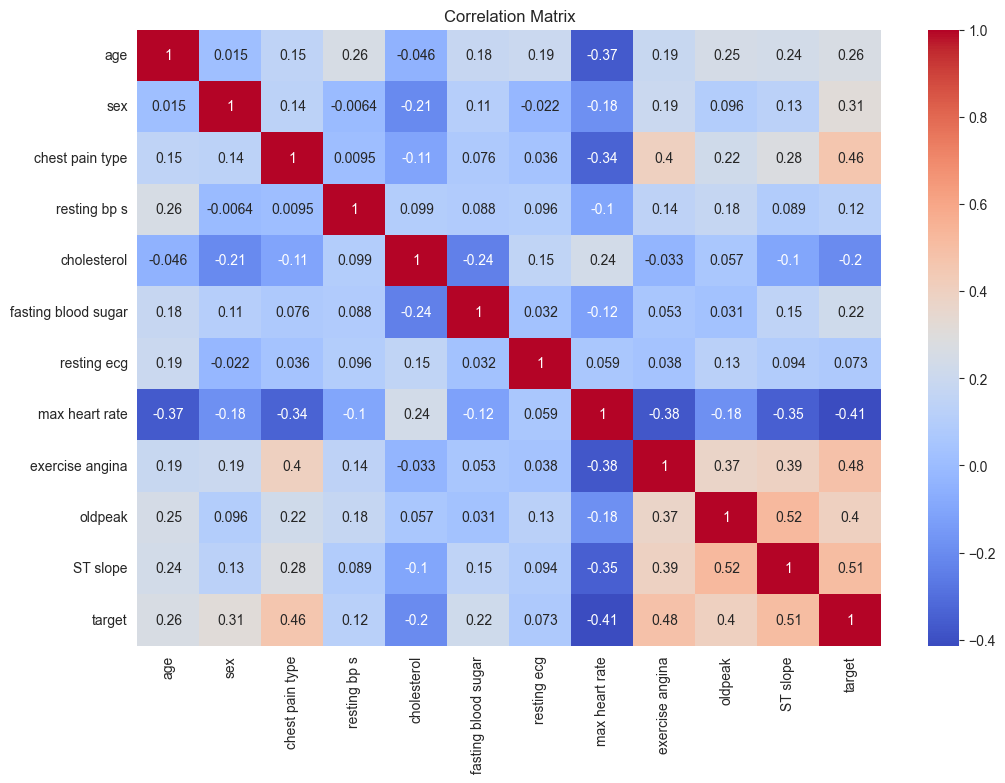

In [53]:
# Visualize the distribution of target variable 'target'
sns.countplot(x='target', data=heart)
plt.title('Distribution of Target Variable')
plt.show()

# Visualize the correlation between numerical variables
correlation_matrix = heart.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


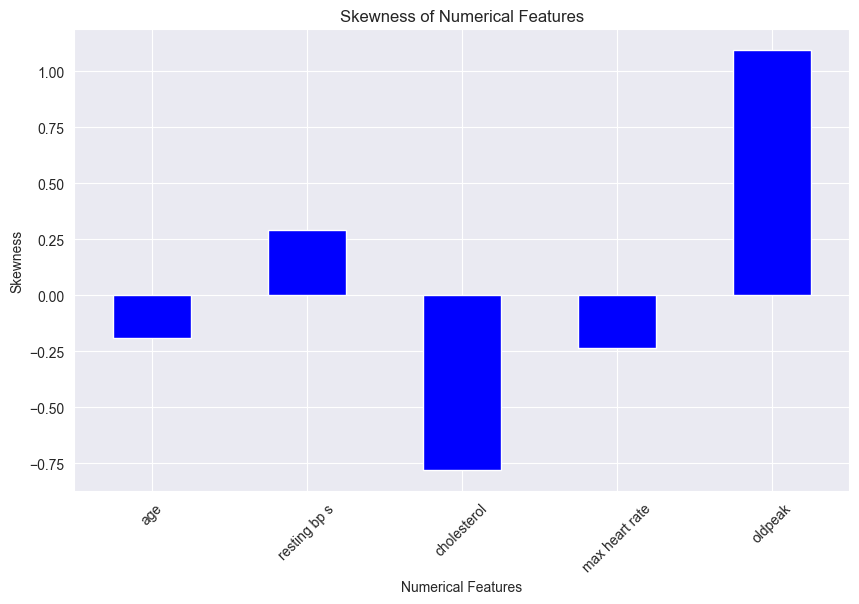

In [54]:
numerical_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Calculate skewness for numerical features
skewness = heart[numerical_features].skew()

# Plot the skewness values
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', color='blue')
plt.title('Skewness of Numerical Features')
plt.xlabel('Numerical Features')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.show()

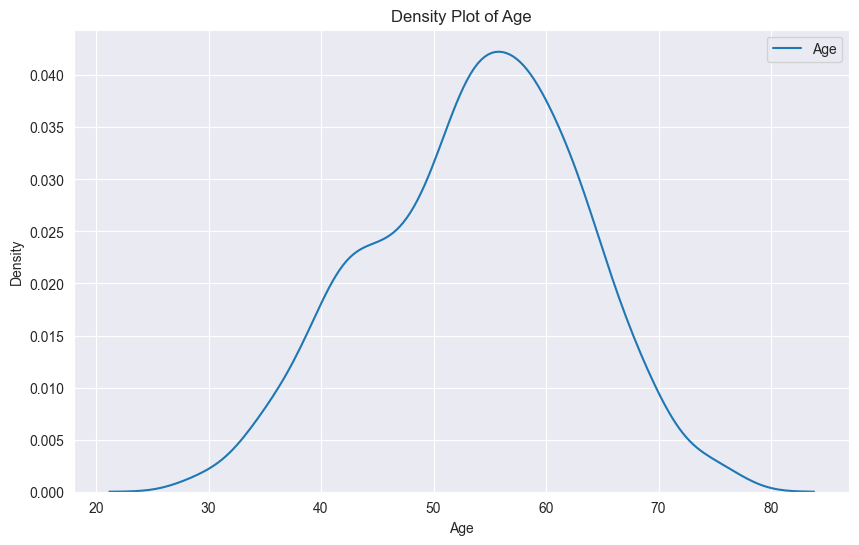

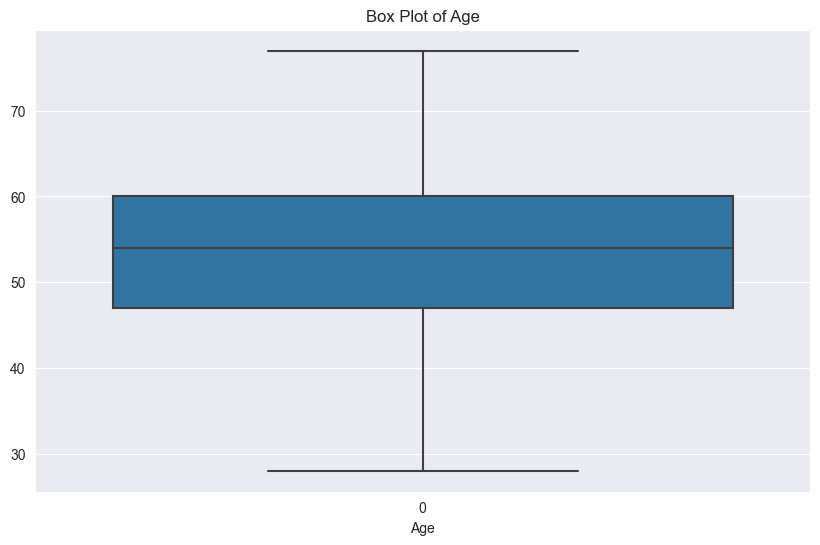

Skewness of Age: -0.19


In [15]:
# Plot Density
plt.figure(figsize=(10, 6))
sns.kdeplot(heart['age'], label='Age')
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# Visualize Skewness
plt.figure(figsize=(10, 6))
sns.boxplot(heart['age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# Calculate Skewness
skewness = heart['age'].skew()
print(f'Skewness of Age: {skewness:.2f}')

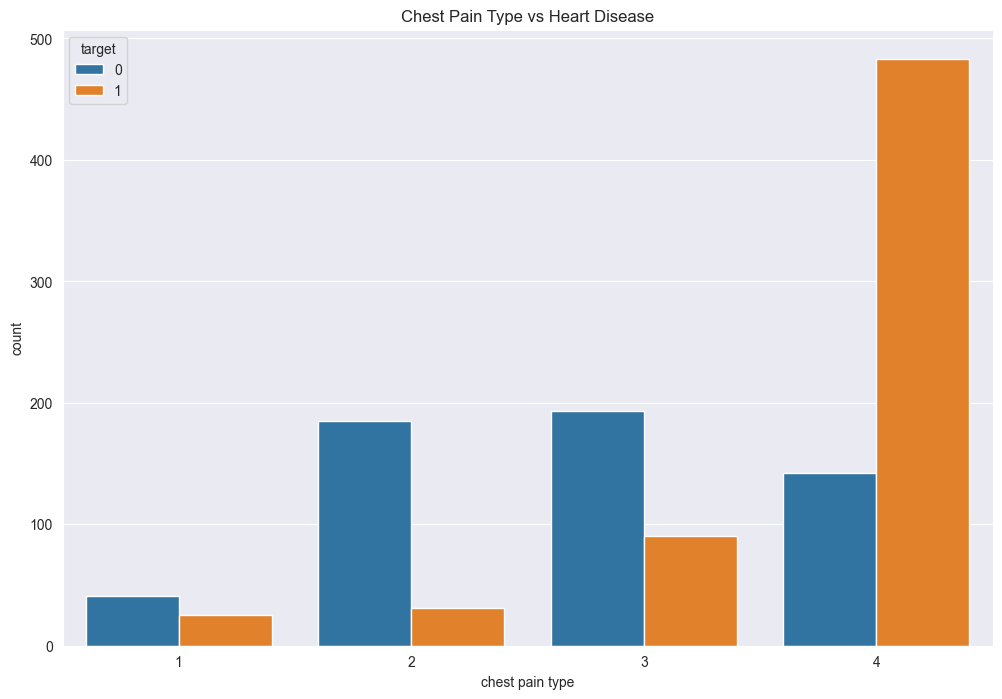

In [56]:
plt.figure(figsize=(12, 8))
sns.countplot(x='chest pain type', hue='target', data=heart)
plt.title('Chest Pain Type vs Heart Disease')
plt.show()


In [57]:
skewness = heart['age'].skew()
print("Skewness of Age:", skewness)


Skewness of Age: -0.19211127980140955


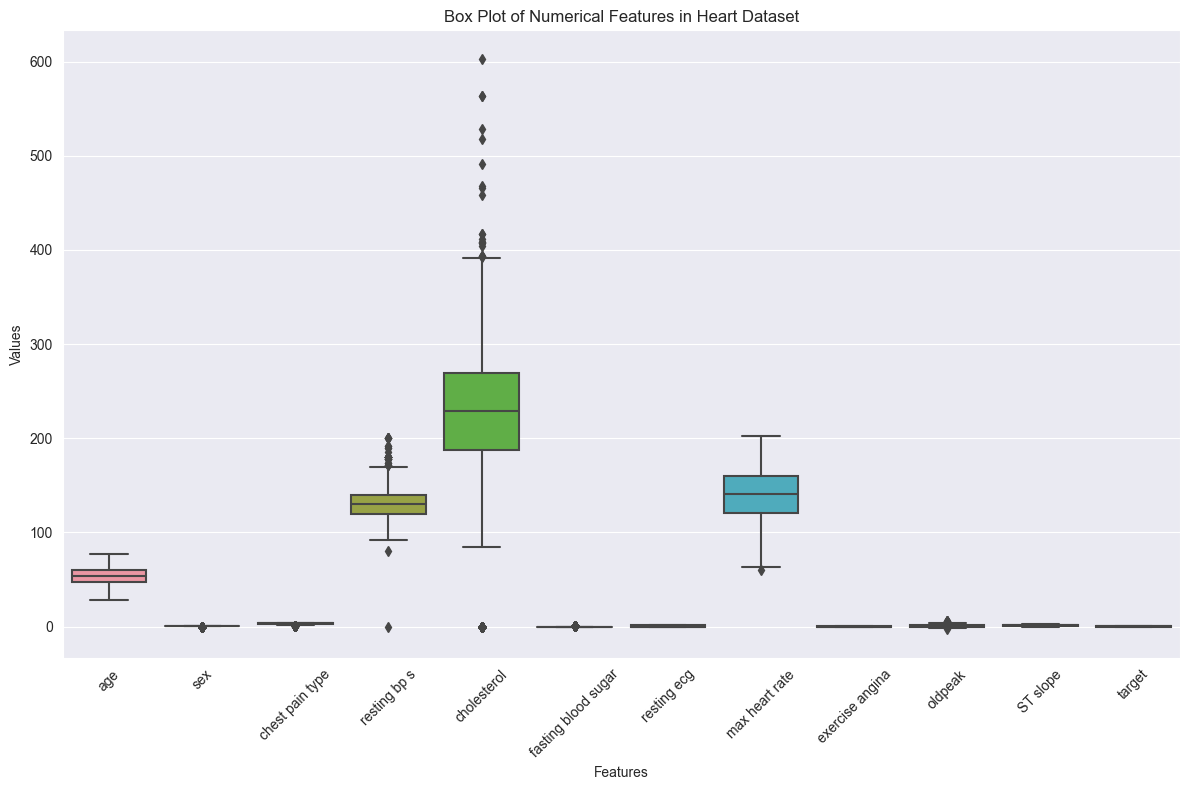

In [58]:
plt.figure(figsize=(12, 8))

# Create a box plot for all numerical features
sns.boxplot(data=heart)

# Set the title and labels
plt.title('Box Plot of Numerical Features in Heart Dataset')
plt.xlabel('Features')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


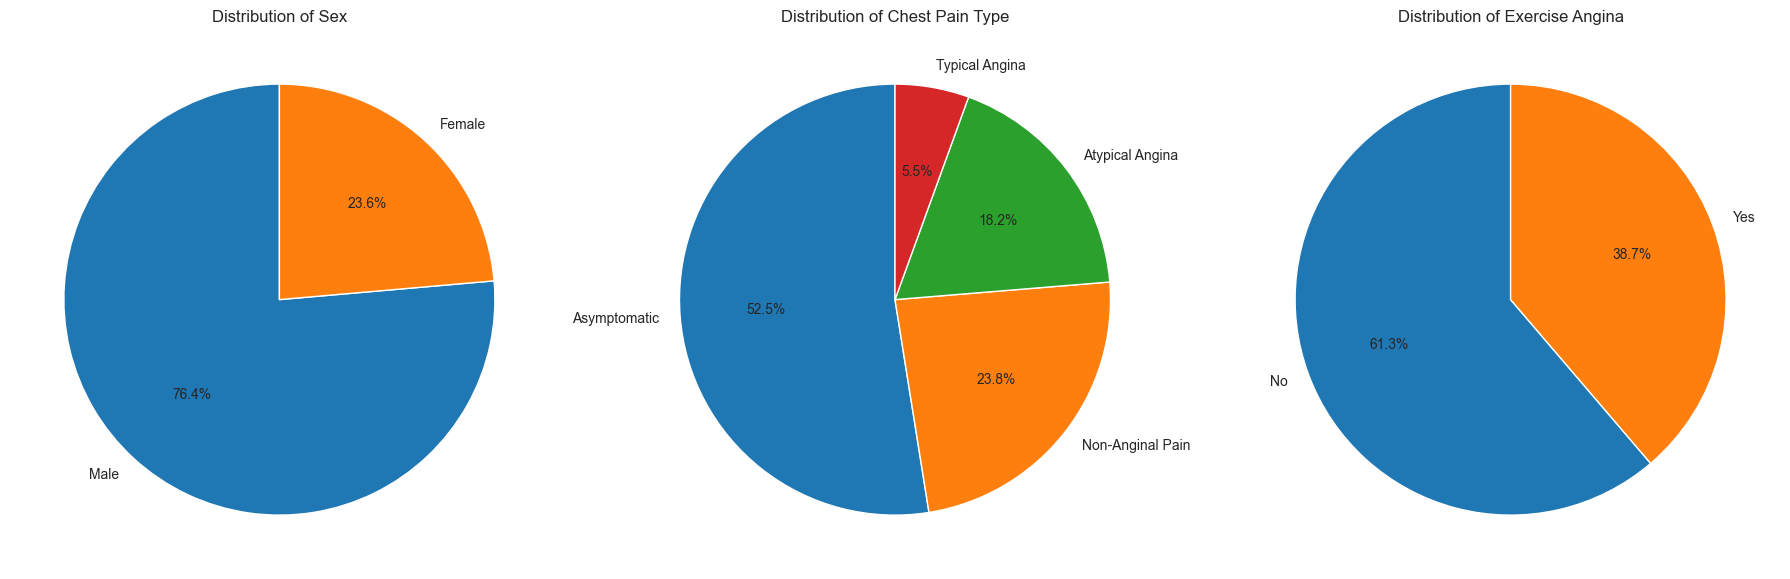

In [59]:
import matplotlib.pyplot as plt

# Map categorical values to meaningful labels
sex_labels = {0: 'Female', 1: 'Male'}
chest_pain_labels = {1: 'Typical Angina', 2: 'Atypical Angina', 3: 'Non-Anginal Pain', 4: 'Asymptomatic'}
exercise_angina_labels = {0: 'No', 1: 'Yes'}

# Apply mapping to create labeled arrays for pie charts
sex_values = [sex_labels[val] for val in heart['sex'].value_counts().index]
chest_pain_values = [chest_pain_labels[val] for val in heart['chest pain type'].value_counts().index]
exercise_angina_values = [exercise_angina_labels[val] for val in heart['exercise angina'].value_counts().index]

# Create subplots for pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot pie chart for 'sex'
axes[0].pie(heart['sex'].value_counts(), labels=sex_values, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribution of Sex')

# Plot pie chart for 'chest pain type'
axes[1].pie(heart['chest pain type'].value_counts(), labels=chest_pain_values, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribution of Chest Pain Type')

# Plot pie chart for 'exercise angina'
axes[2].pie(heart['exercise angina'].value_counts(), labels=exercise_angina_values, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Distribution of Exercise Angina')

plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest pain type'}>],
       [<Axes: title={'center': 'resting bp s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting blood sugar'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'max heart rate'}>,
        <Axes: title={'center': 'exercise angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST slope'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

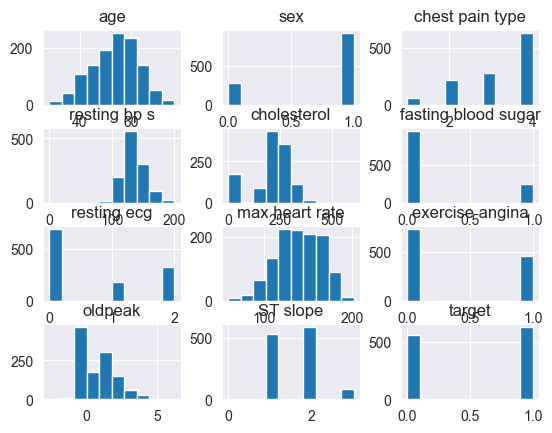

In [60]:
heart.hist()

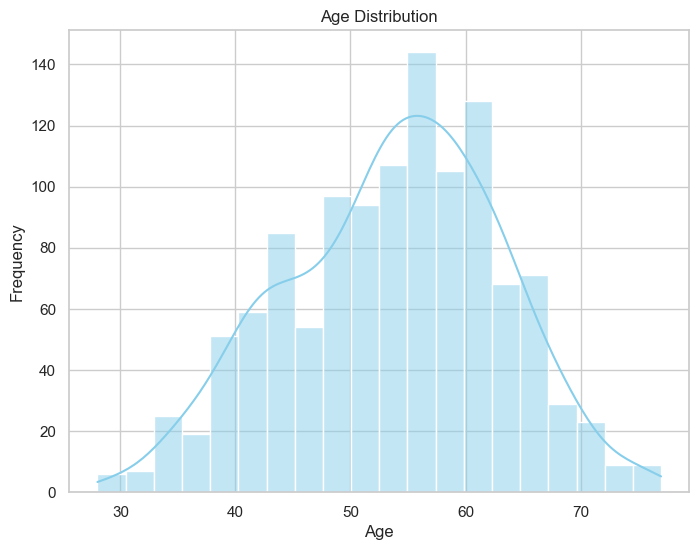

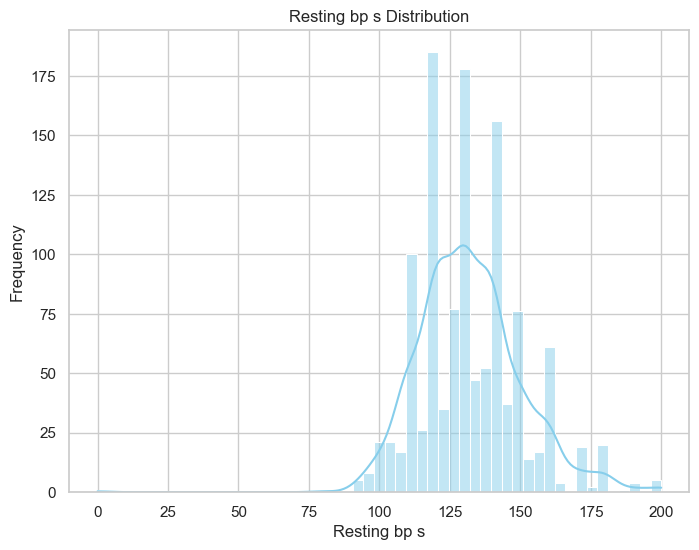

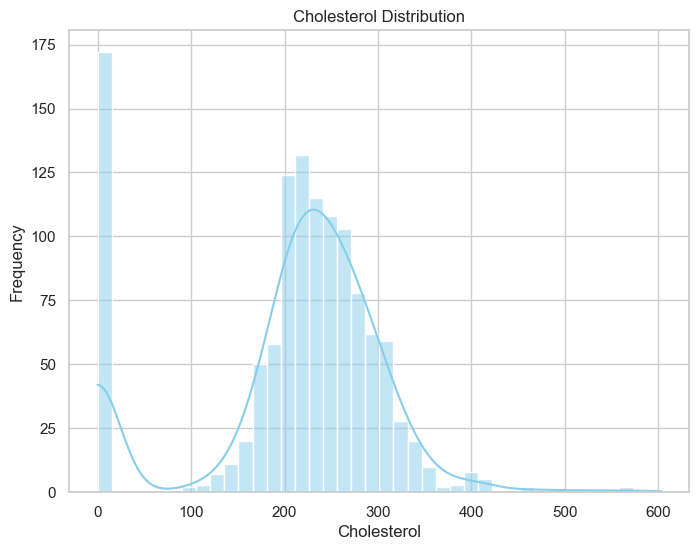

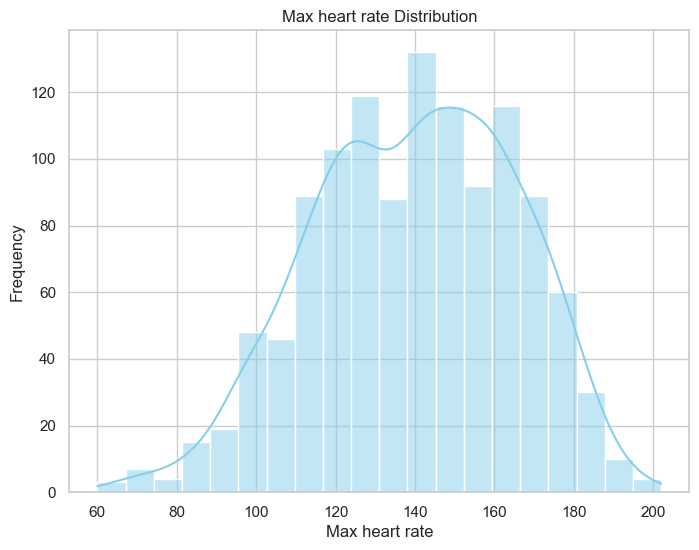

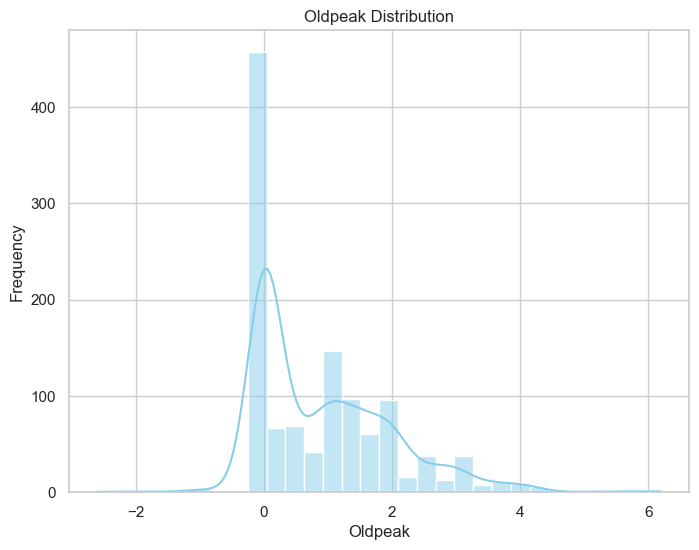

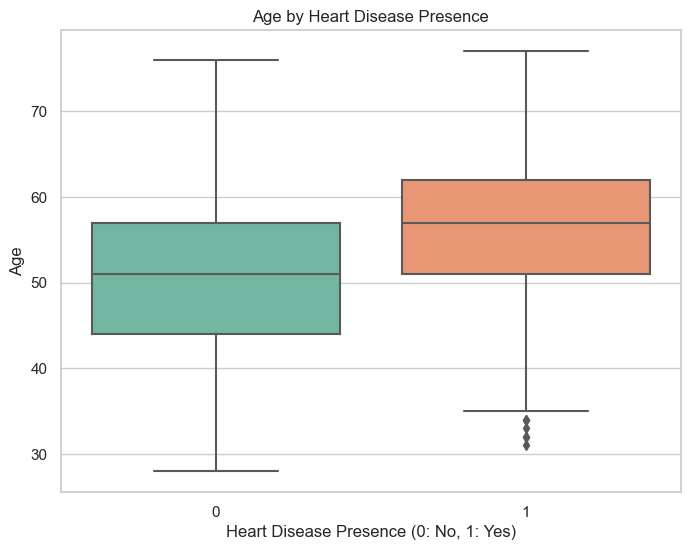

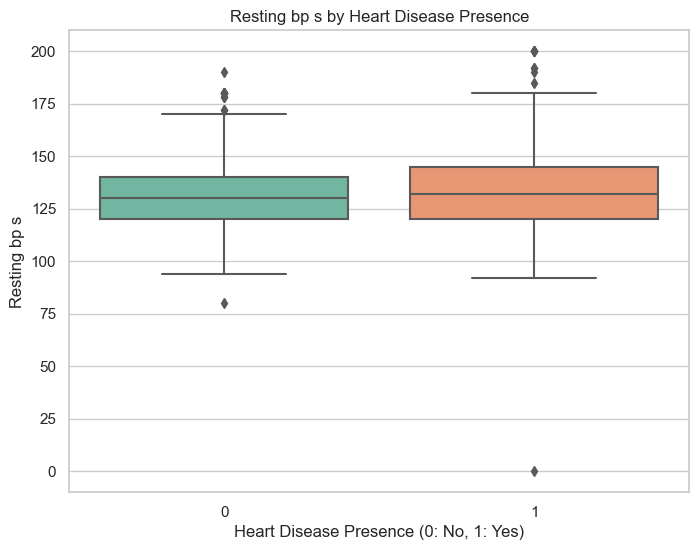

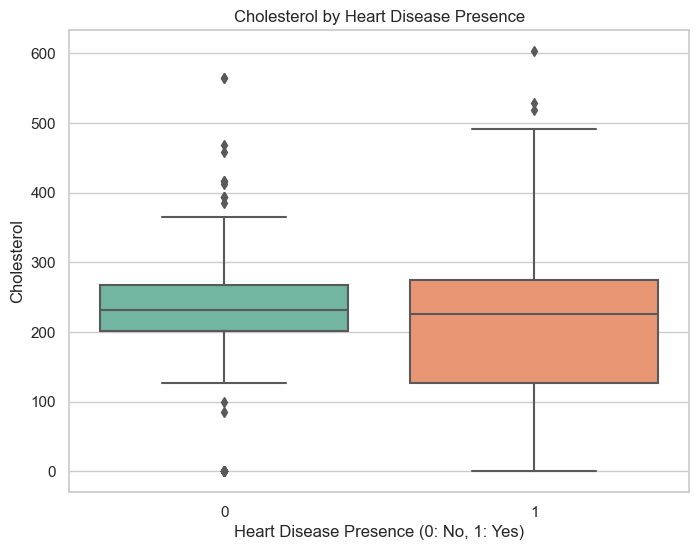

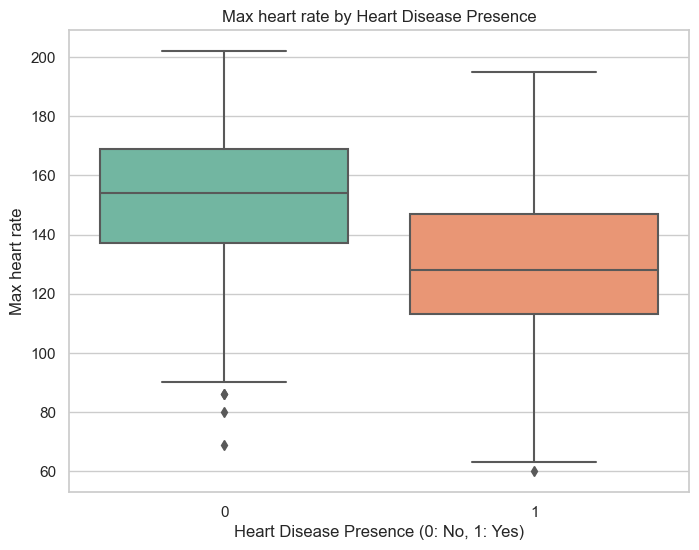

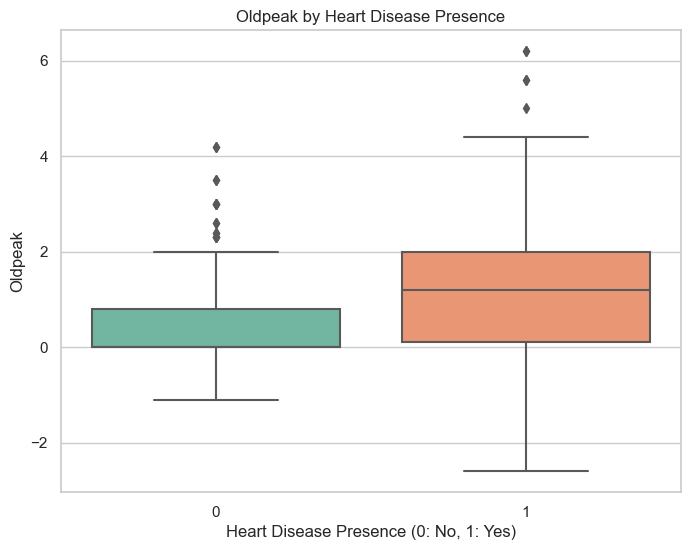

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical variables list
numerical_vars = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Basic statistics for numerical variables
numerical_stats = heart[numerical_vars].describe()

# Distribution plots for numerical variables
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=heart, x=var, kde=True, color='skyblue')
    plt.title(f"{var.capitalize()} Distribution")
    plt.xlabel(var.capitalize())
    plt.ylabel("Frequency")
    plt.show()

# Box plots for numerical variables
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=heart, x='target', y=var, palette="Set2")
    plt.title(f"{var.capitalize()} by Heart Disease Presence")
    plt.xlabel('Heart Disease Presence (0: No, 1: Yes)')
    plt.ylabel(var.capitalize())
    plt.show()


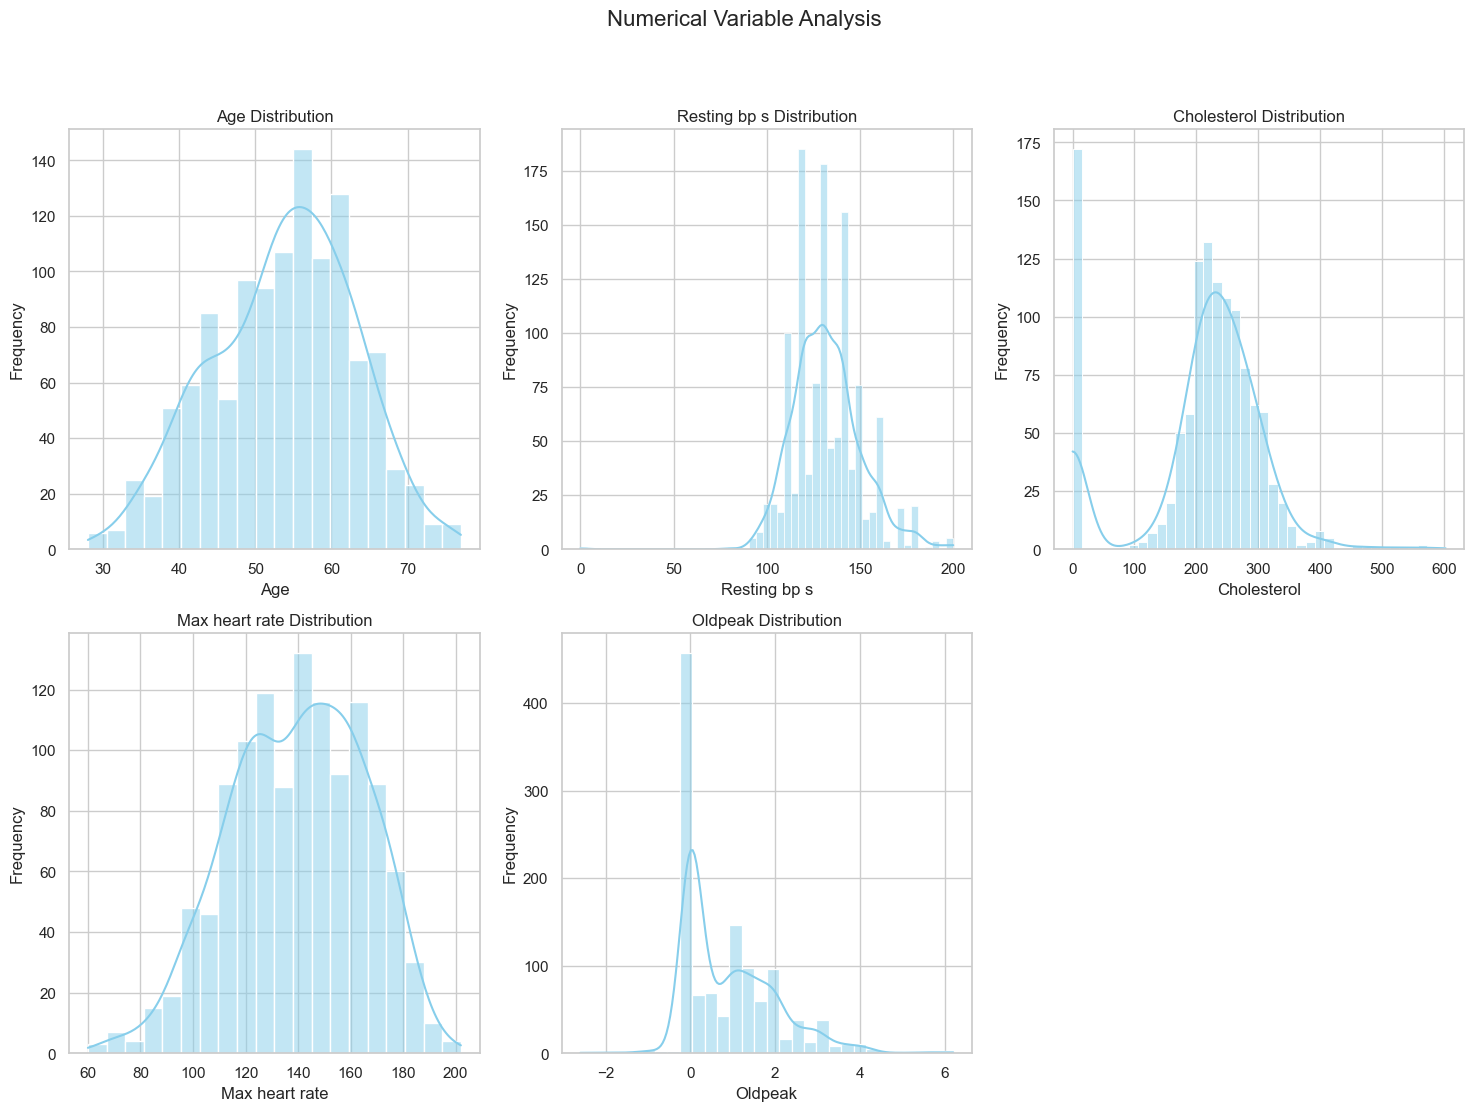

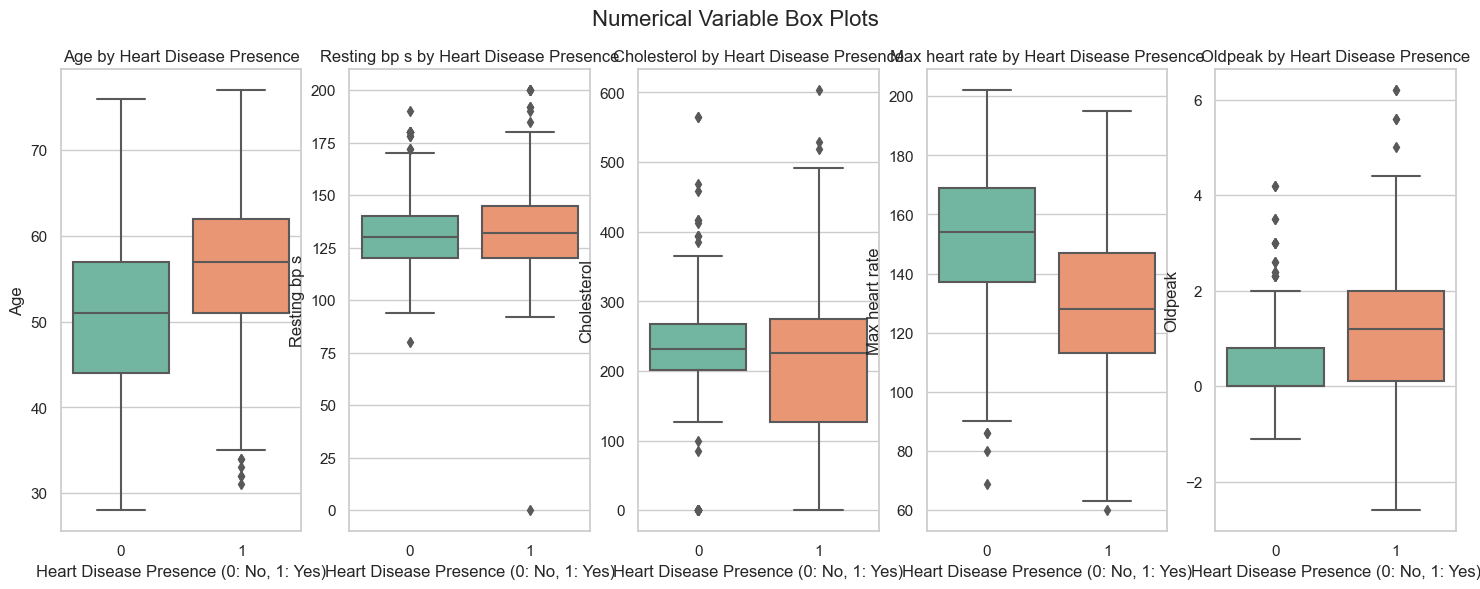

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical variables list
numerical_vars = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Basic statistics for numerical variables
numerical_stats = heart[numerical_vars].describe()

# Create subplots for distribution plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Numerical Variable Analysis', fontsize=16)

for i, var in enumerate(numerical_vars):
    row, col = divmod(i, 3)
    sns.histplot(data=heart, x=var, kde=True, color='skyblue', ax=axes[row, col])
    axes[row, col].set_title(f"{var.capitalize()} Distribution")
    axes[row, col].set_xlabel(var.capitalize())
    axes[row, col].set_ylabel("Frequency")

# Remove empty subplot if the number of numerical variables is not a multiple of 3
if len(numerical_vars) % 3 != 0:
    for i in range(len(numerical_vars) % 3, 3):
        fig.delaxes(axes[1, i])

# Create subplots for box plots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_vars), figsize=(18, 6))
fig.suptitle('Numerical Variable Box Plots', fontsize=16)

for i, var in enumerate(numerical_vars):
    sns.boxplot(data=heart, x='target', y=var, palette="Set2", ax=axes[i])
    axes[i].set_title(f"{var.capitalize()} by Heart Disease Presence")
    axes[i].set_xlabel('Heart Disease Presence (0: No, 1: Yes)')
    axes[i].set_ylabel(var.capitalize())

plt.show()


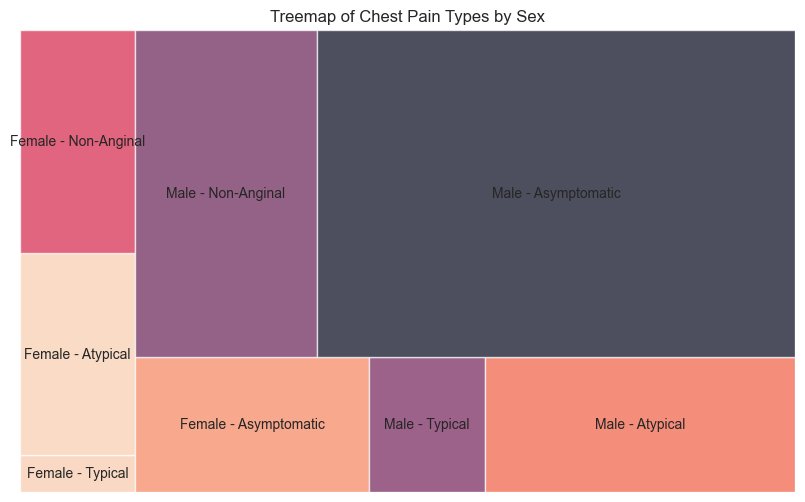

In [76]:
labels = ['Female - Typical', 'Female - Atypical', 'Female - Non-Anginal', 'Female - Asymptomatic',
          'Male - Typical', 'Male - Atypical', 'Male - Non-Anginal', 'Male - Asymptomatic']

# Create a treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=data.values.flatten(), label=labels, alpha=0.7)
plt.title("Treemap of Chest Pain Types by Sex")
plt.axis('off')
plt.show()


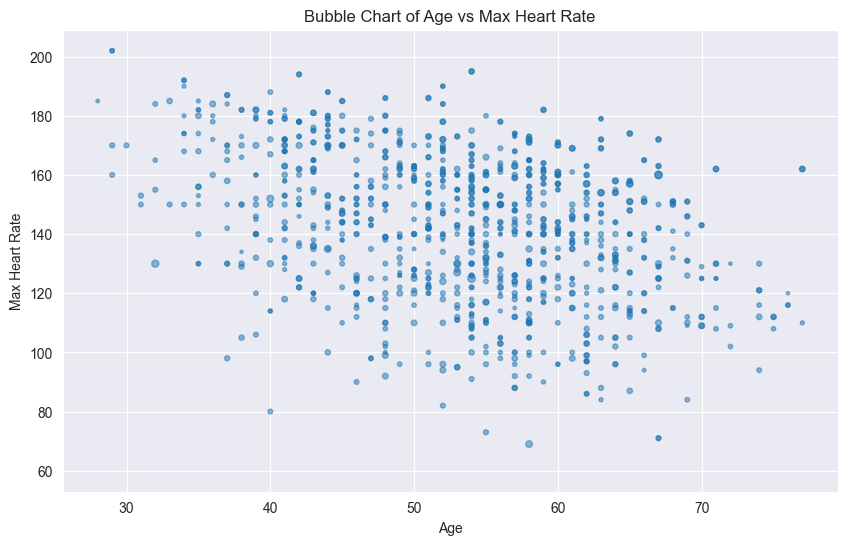

In [63]:
plt.figure(figsize=(10, 6))

# Create a bubble chart
plt.scatter(x=heart['age'], y=heart['max heart rate'], s=heart['cholesterol']*0.05, alpha=0.5)
plt.title("Bubble Chart of Age vs Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.show()


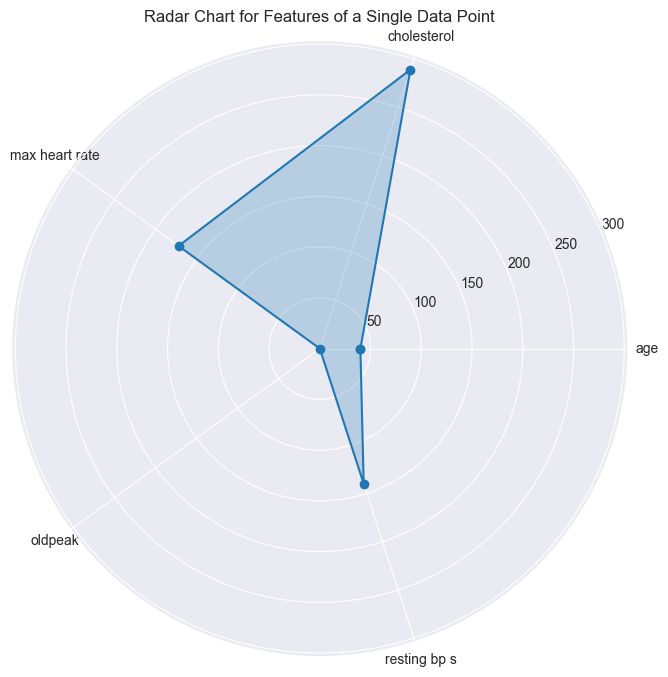

In [64]:
from math import pi

# Feature names
features = ['age', 'cholesterol', 'max heart rate', 'oldpeak', 'resting bp s']

# Calculate angles for radar chart
angles = [n / float(len(features)) * 2 * pi for n in range(len(features))]
angles += angles[:1]  # Repeat the first angle to close the chart

plt.figure(figsize=(8, 8))

# Create a radar chart
ax = plt.subplot(111, polar=True)
ax.plot(angles, heart.loc[0, features].values.tolist() + heart.loc[0, features].values.tolist()[:1], 'o-')
ax.fill(angles, heart.loc[0, features].values.tolist() + heart.loc[0, features].values.tolist()[:1], alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)
ax.set_title("Radar Chart for Features of a Single Data Point")
ax.grid(True)
plt.show()


/Users/macbook/Downloads/pythonProject24/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


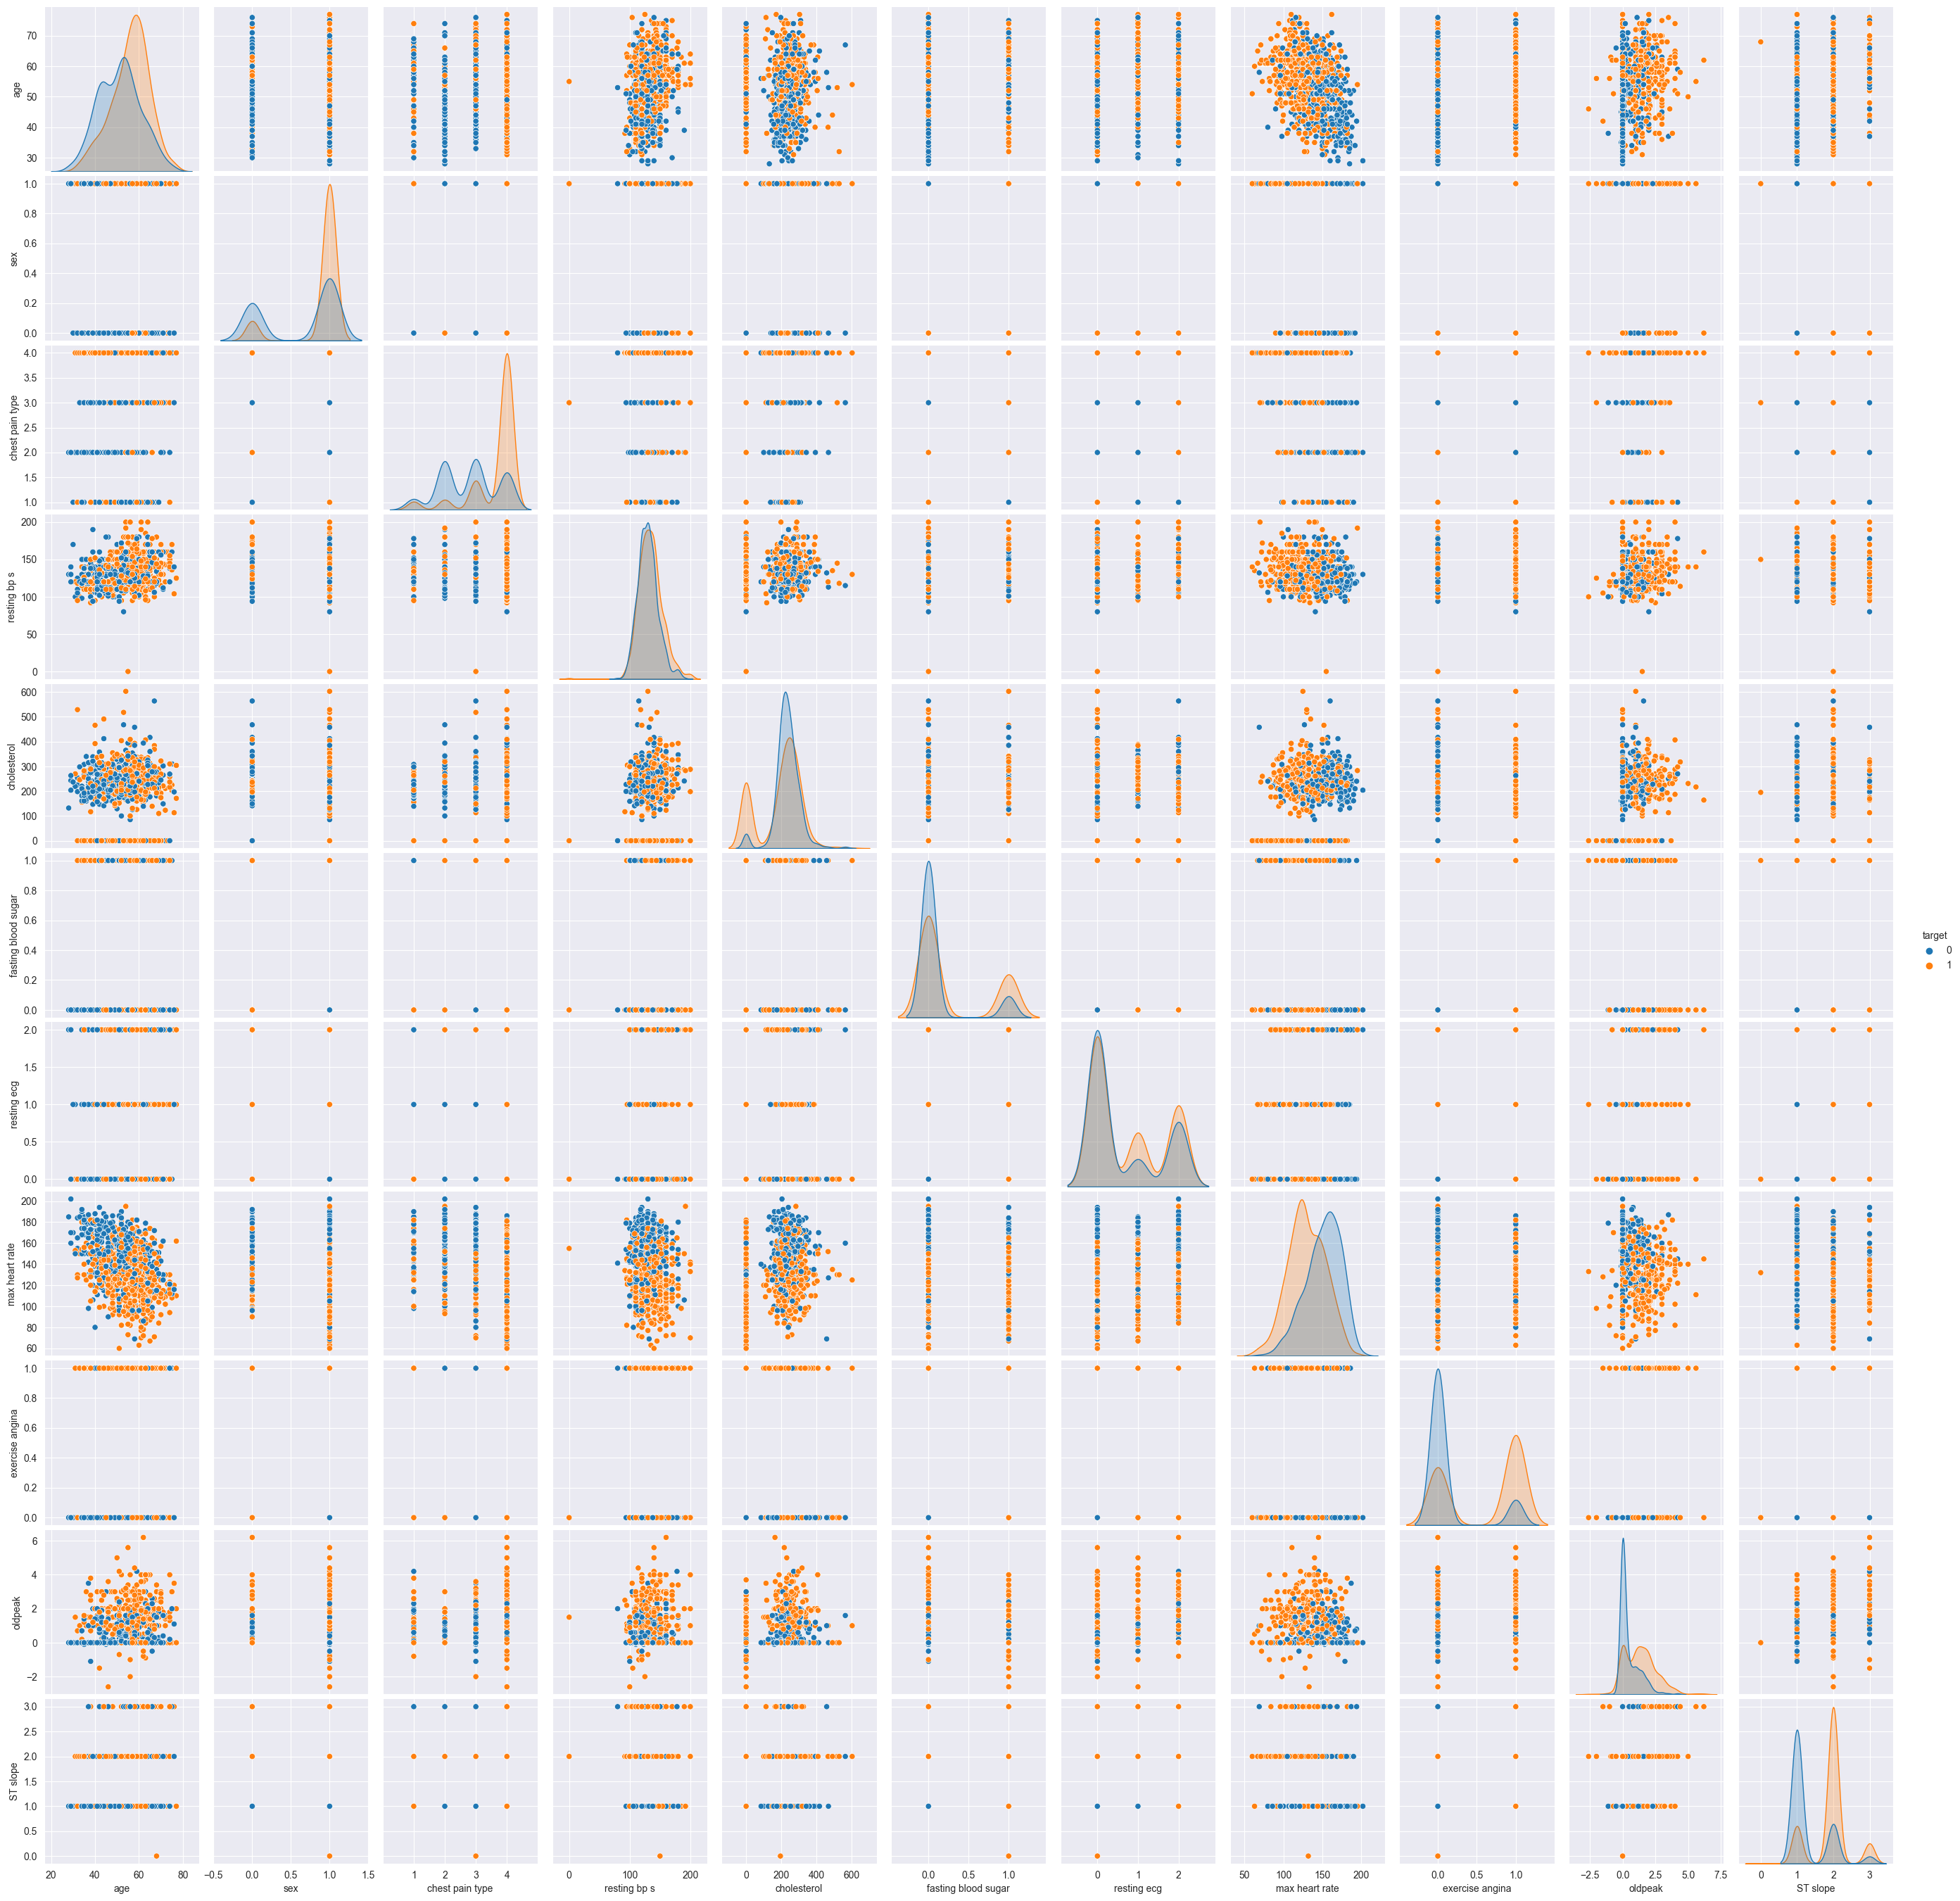

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between numerical features and target
sns.pairplot(heart, hue='target', diag_kind='kde')
plt.show()


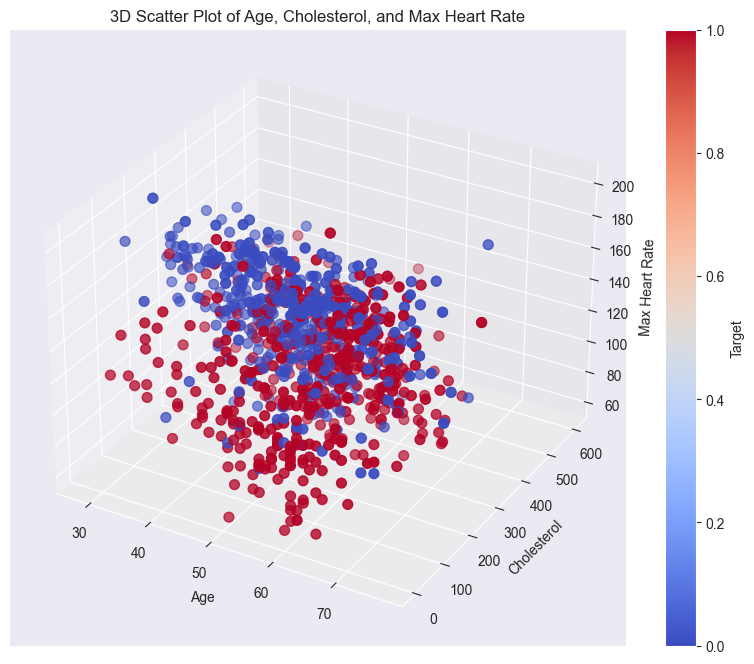

In [81]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    heart['age'],
    heart['cholesterol'],
    heart['max heart rate'],
    c=heart['target'],
    cmap='coolwarm',
    s=50
)

ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Max Heart Rate')

# Adding colorbar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Target')

plt.title('3D Scatter Plot of Age, Cholesterol, and Max Heart Rate')
plt.show()


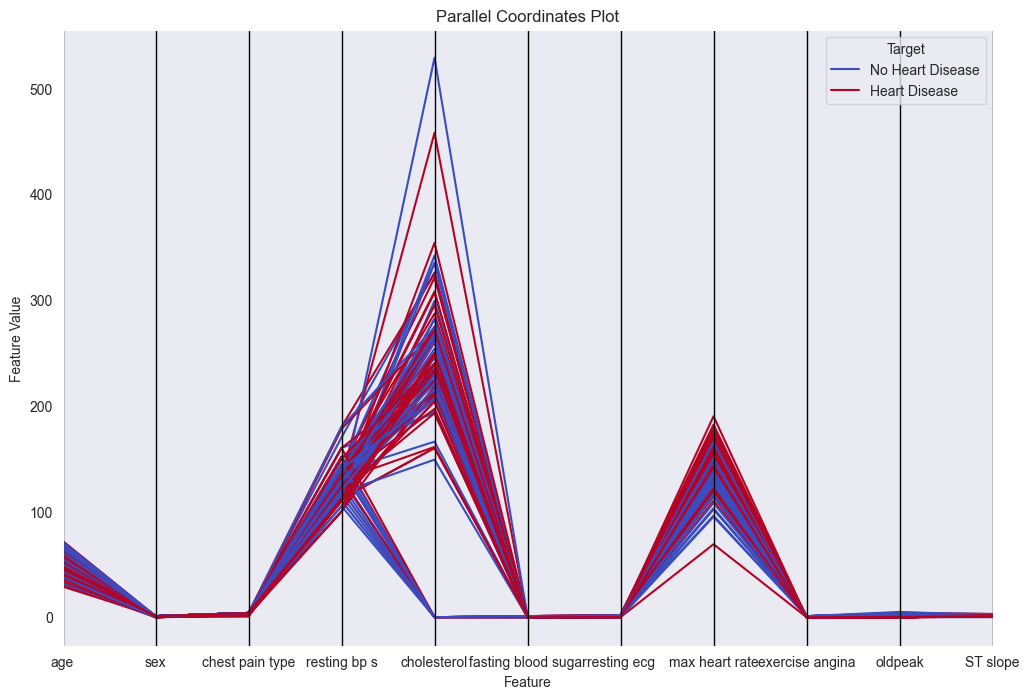

In [82]:
from pandas.plotting import parallel_coordinates

# Select a subset of data for visualization
subset_data = heart.sample(100)

plt.figure(figsize=(12, 8))
parallel_coordinates(subset_data, 'target', colormap='coolwarm')
plt.title('Parallel Coordinates Plot')
plt.xlabel('Feature')
plt.ylabel('Feature Value')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()


In [84]:
import plotly.express as px

fig = px.scatter_3d(
    heart,
    x='age',
    y='cholesterol',
    z='max heart rate',
    color='target',
    symbol='target',
    opacity=0.7,
    title='Interactive 3D Scatter Plot'
)
fig.show()


Heart Preprocessing

In [18]:
# Perform one-hot encoding for categorical variables
categorical_columns = ['sex', 'chest pain type', 'resting ecg', 'ST slope']
heart_encoded = pd.get_dummies(heart, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataset
print(heart_encoded.head())


   age  resting bp s  cholesterol  fasting blood sugar  max heart rate  \
0   40           140          289                    0             172   
1   49           160          180                    0             156   
2   37           130          283                    0              98   
3   48           138          214                    0             108   
4   54           150          195                    0             122   

   exercise angina  oldpeak  target  sex_1  chest pain type_2  \
0                0      0.0       0   True               True   
1                0      1.0       1  False              False   
2                0      0.0       0   True               True   
3                1      1.5       1  False              False   
4                0      0.0       0   True              False   

   chest pain type_3  chest pain type_4  resting ecg_1  resting ecg_2  \
0              False              False          False          False   
1               Tr

Standardization of the Data

In [19]:


# Select numerical columns for scaling
numerical_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
heart_encoded[numerical_columns] = scaler.fit_transform(heart_encoded[numerical_columns])


In [11]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = heart_encoded.drop('target', axis=1)
y = heart_encoded['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (952, 16)
X_test shape: (238, 16)
y_train shape: (952,)
y_test shape: (238,)


In [12]:
# Check data types and shapes of X_train and X_test
print("X_train data types:\n", X_train.dtypes)
print("\nX_test data types:\n", X_test.dtypes)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train data types:
 age                    float64
resting bp s           float64
cholesterol            float64
fasting blood sugar      int64
max heart rate         float64
exercise angina          int64
oldpeak                float64
sex_1                     bool
chest pain type_2         bool
chest pain type_3         bool
chest pain type_4         bool
resting ecg_1             bool
resting ecg_2             bool
ST slope_1                bool
ST slope_2                bool
ST slope_3                bool
dtype: object

X_test data types:
 age                    float64
resting bp s           float64
cholesterol            float64
fasting blood sugar      int64
max heart rate         float64
exercise angina          int64
oldpeak                float64
sex_1                     bool
chest pain type_2         bool
chest pain type_3         bool
chest pain type_4         bool
resting ecg_1             bool
resting ecg_2             bool
ST slope_1                bool
ST slope_2    

In [13]:
# Check for missing values in X_train
print("Missing values in X_train:\n", X_train.isnull().sum())

# Check for missing values in X_test
print("\nMissing values in X_test:\n", X_test.isnull().sum())


Missing values in X_train:
 age                    0
resting bp s           0
cholesterol            0
fasting blood sugar    0
max heart rate         0
exercise angina        0
oldpeak                0
sex_1                  0
chest pain type_2      0
chest pain type_3      0
chest pain type_4      0
resting ecg_1          0
resting ecg_2          0
ST slope_1             0
ST slope_2             0
ST slope_3             0
dtype: int64

Missing values in X_test:
 age                    0
resting bp s           0
cholesterol            0
fasting blood sugar    0
max heart rate         0
exercise angina        0
oldpeak                0
sex_1                  0
chest pain type_2      0
chest pain type_3      0
chest pain type_4      0
resting ecg_1          0
resting ecg_2          0
ST slope_1             0
ST slope_2             0
ST slope_3             0
dtype: int64


In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Initialize the Support Vector Classifier
svc_model = SVC(kernel='linear', C=1.0)  # You can adjust the kernel and C parameter

# Train the model on the training data
svc_model.fit(X_train, y_train)
joblib.dump(svc_model, 'svc_model.pkl')
# Predict on the testing data
y_pred = svc_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[ 88  19]
 [ 12 119]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       107
           1       0.86      0.91      0.88       131

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238


Accuracy: 0.8697478991596639


In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rrse = rmse / y_test.mean() 

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Relative Root Mean Squared Error:", rrse)


Precision: 0.8623188405797102
Recall: 0.9083969465648855
F1-Score: 0.8847583643122676

Confusion Matrix:
 [[ 88  19]
 [ 12 119]]
Mean Squared Error: 0.13025210084033614
Mean Absolute Error: 0.13025210084033614
Root Mean Squared Error: 0.36090455918474645
Relative Root Mean Squared Error: 0.6556891991295393


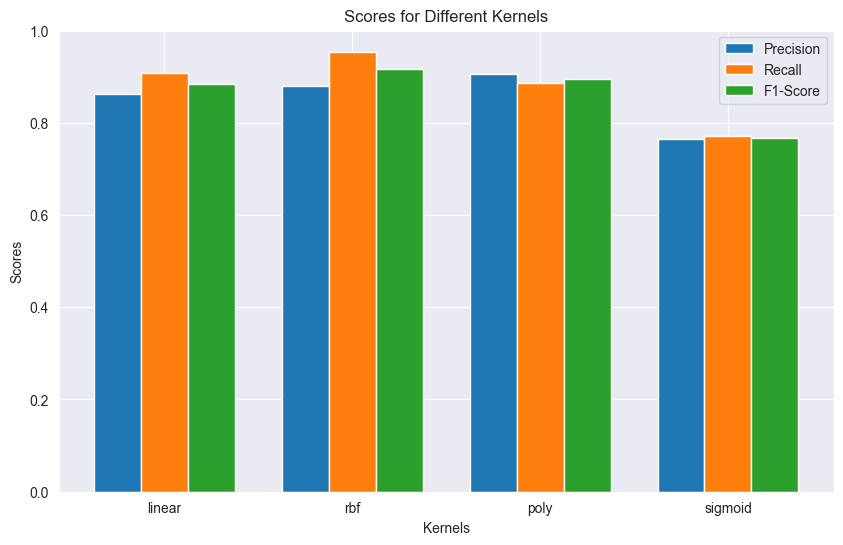

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize SVC with different kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
scores_precision = []
scores_recall = []
scores_f1 = []

for kernel in kernels:
    svc_model = SVC(kernel=kernel, C=1.0)
    svc_model.fit(X_train, y_train)
    y_pred = svc_model.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    scores_precision.append(precision)
    scores_recall.append(recall)
    scores_f1.append(f1)

# Plot the scores for each kernel
x = np.arange(len(kernels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, scores_precision, width, label='Precision')
rects2 = ax.bar(x, scores_recall, width, label='Recall')
rects3 = ax.bar(x + width, scores_f1, width, label='F1-Score')

ax.set_xlabel('Kernels')
ax.set_ylabel('Scores')
ax.set_title('Scores for Different Kernels')
ax.set_xticks(x)
ax.set_xticklabels(kernels)
ax.legend()

plt.show()


In [8]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

X = heart_encoded.drop('target', axis=1)  # Features


y = heart_encoded['target']  # Target variable

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
clf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)

# Sort features by importance
sorted_features = feature_importances.sort_values(ascending=False)

# Display the sorted feature importances
print(sorted_features)


ST slope_1             0.129245
chest pain type_4      0.118050
max heart rate         0.110452
cholesterol            0.096407
oldpeak                0.088381
resting bp s           0.083908
ST slope_2             0.083731
age                    0.083075
exercise angina        0.076646
sex_1                  0.043861
chest pain type_2      0.020149
resting ecg_2          0.019623
fasting blood sugar    0.017364
chest pain type_3      0.014134
resting ecg_1          0.008514
ST slope_3             0.006459
dtype: float64


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

X = heart_encoded.drop('target', axis=1)  # Features
y = heart_encoded['target']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Transform the testing set using the same scaler
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Initialize models
svm_model = SVC(kernel='linear', random_state=42)
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Combine models
models = [('SVM', svm_model), ('Random Forest', rf_model), ('Decision Tree', dt_model)]

# Loop through models
for model_name, model in models:
    # Initialize Recursive Feature Elimination with cross-validated selection
    rfe = RFE(estimator=model)
    
    # Fit RFE on the training data
    rfe.fit(X_train, y_train)

    # Get selected features
    selected_features = X_train.columns[rfe.support_]

    # Print the selected features for each model
    print(f"Selected Features for {model_name}:", selected_features)



Selected Features for SVM: Index(['age', 'fasting blood sugar', 'exercise angina', 'sex_1',
       'chest pain type_4', 'ST slope_1', 'ST slope_2', 'ST slope_3'],
      dtype='object')
Selected Features for Random Forest: Index(['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak',
       'chest pain type_4', 'ST slope_1', 'ST slope_2'],
      dtype='object')
Selected Features for Decision Tree: Index(['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak',
       'sex_1', 'chest pain type_4', 'ST slope_1'],
      dtype='object')


In [21]:
from sklearn.model_selection import train_test_split
# Define the features (X) and the target (y)
X = heart_encoded[selected_features]
y = heart_encoded['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (952, 8)
X_test shape: (238, 8)
y_train shape: (952,)
y_test shape: (238,)


Accuracy: 0.92
Precision: 0.92
Recall: 0.94
F1 Score: 0.93
ROC-AUC: 0.97


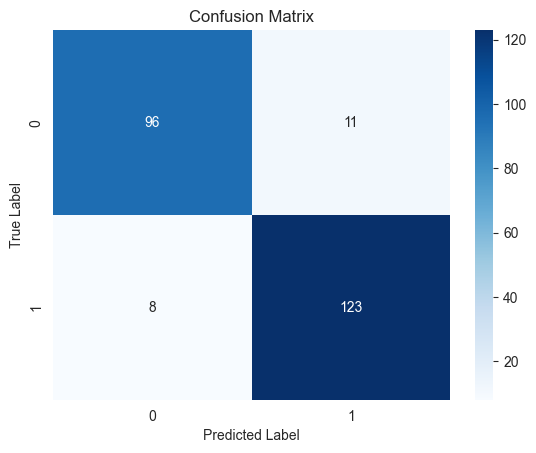

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates needed for ROC-AUC

# Evaluate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Decision Tree Accuracy: 0.88
Decision Tree Precision: 0.93
Decision Tree Recall: 0.85
Decision Tree F1 Score: 0.89
Decision Tree ROC-AUC: 0.89
Decision Tree Mean Squared Error: 0.12
Decision Tree Mean Absolute Error: 0.12


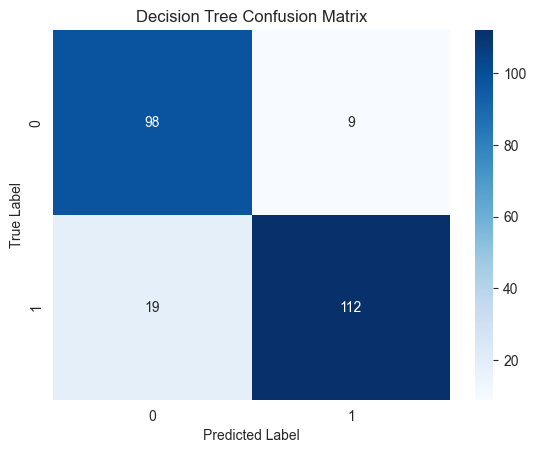

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]  # Probability estimates needed for ROC-AUC

# Evaluate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print metrics
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(f"Decision Tree Precision: {precision:.2f}")
print(f"Decision Tree Recall: {recall:.2f}")
print(f"Decision Tree F1 Score: {f1:.2f}")
print(f"Decision Tree ROC-AUC: {roc_auc:.2f}")
print(f"Decision Tree Mean Squared Error: {mse:.2f}")
print(f"Decision Tree Mean Absolute Error: {mae:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.show()


Accuracy on the Testing Set: 0.8319327731092437


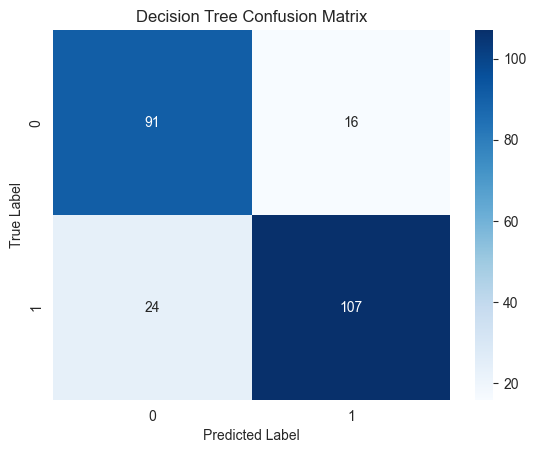

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib



# Select the specified features
selected_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'chest pain type_4']

# Define features and target variable
X = heart_encoded[selected_features]  # Features
y = heart_encoded['target']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train = scaler.fit_transform(X_train)

# Transform the testing set using the same scaler
X_test = scaler.transform(X_test)

# Initialize models
svm_model = SVC(kernel='linear', probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Combine models into a voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('SVM', svm_model),
    ('Random Forest', rf_model),
    ('Decision Tree', dt_model)
], voting='soft')  # 'soft' enables probability voting for SVM



# Train the ensemble model
voting_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = voting_classifier.predict(X_test)

joblib.dump(voting_classifier, 'ensemble_model.joblib')
# Calculate accuracy on the testing set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the Testing Set:", accuracy)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.show()


Best Hyperparameters: {'Decision Tree__max_depth': None, 'Random Forest__n_estimators': 50, 'SVM__C': 0.1}
Accuracy on the Testing Set: 0.8445378151260504
Precision on the Testing Set: 0.8671875
Recall on the Testing Set: 0.8473282442748091
F1 Score on the Testing Set: 0.8571428571428571
AUC-ROC on the Testing Set: 0.8952700292501963
Mean Squared Error on the Testing Set: 0.15546218487394958
Mean Absolute Error on the Testing Set: 0.15546218487394958


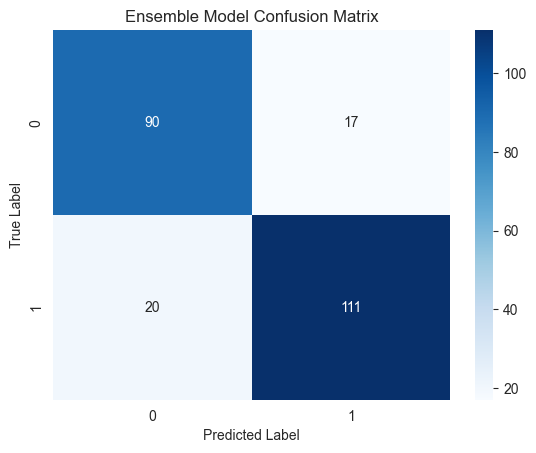

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Select the specified features
selected_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'chest pain type_4']

# Define features and target variable
X = heart_encoded[selected_features]  # Features
y = heart_encoded['target']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train = scaler.fit_transform(X_train)

# Transform the testing set using the same scaler
X_test = scaler.transform(X_test)

# Initialize models
svm_model = SVC(kernel='linear', probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Combine models into a voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('SVM', svm_model),
    ('Random Forest', rf_model),
    ('Decision Tree', dt_model)
], voting='soft')  # 'soft' enables probability voting for SVM

# Hyperparameter tuning using Grid Search
param_grid = {
    'SVM__C': [0.1, 1, 20],
    'Random Forest__n_estimators': [50, 100, 50],
    'Decision Tree__max_depth': [None, 10, 50]
}

grid_search = GridSearchCV(estimator=voting_classifier, param_grid=param_grid, cv=7, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Fit the ensemble model with the best parameters
best_voting_classifier = grid_search.best_estimator_
best_voting_classifier.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(best_voting_classifier, 'best_ensemble_model.joblib')# Make predictions on the testing set
y_pred = best_voting_classifier.predict(X_test)

# Calculate and print various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_voting_classifier.predict_proba(X_test)[:, 1])
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Accuracy on the Testing Set:", accuracy)
print("Precision on the Testing Set:", precision)
print("Recall on the Testing Set:", recall)
print("F1 Score on the Testing Set:", f1)
print("AUC-ROC on the Testing Set:", roc_auc)
print("Mean Squared Error on the Testing Set:", mse)
print("Mean Absolute Error on the Testing Set:", mae)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Ensemble Model Confusion Matrix")
plt.show()
